> ### What inside the dataset??

| Column Name     | Description                                                                                       |
|-----------------|---------------------------------------------------------------------------------------------------|
| ID              | Unique identifier/serial number for each data entry.                                              |
| Model           | iPhone model/type, e.g., iPhone 11, iPhone 12 Pro Max, iPhone 13, etc.                            |
| StorageCapacityGB | Storage capacity of the iPhone in GB, e.g., 64, 128, 256, 512, 1TB.                              |
| Color           | The color of the iPhone unit, e.g., Black, White, Green, Red, Blue, Gold, Starlight, etc.          |
| YearRecorded    | The year the data/ad for the used iPhone was recorded or posted on the marketplace.               |
| PriceIDR        | The selling price of the used iPhone in Indonesian Rupiah (IDR), target prediction.          |
| Status          | Condition of the item, generally "Used" (secondhand/used).                                        |
| Condition       | Physical condition of the unit, e.g., Mint, Like New, Light Scratches, Usage Scratches, Damaged, Broken, etc. |
| Category        | Category of the item, e.g., Official (official distribution), Ex-Inter (ex-import), Customs, etc. |
| Marketplace     | The marketplace/platform where the unit is sold, e.g., Facebook Marketplace, OLX, Carousell, etc. |
| Source          | More specific source of the data, e.g., Buy and Sell Forum, Kaskus, Facebook Marketplace, etc.    |
| Location        | The city or region of the seller, e.g., Jakarta, Bandung, Surabaya, Yogyakarta, Batam, etc.       |


> ### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv('dataset_ip_bekas_marketplace.csv')
df.head()

,ID,Model,Kapasitas_GB,Warna,Tahun_Pencatatan,Harga_IDR,Status,Kondisi,Kategori_Pasar,Sumber,Lokasi
0,1,iPhone 11,64,Black,2022,6700000,Bekas,Mulus,Resmi,Facebook Marketplace,Jakarta
1,2,iPhone 11,64,White,2022,6500000,Bekas,Mulus,Resmi,OLX,Jakarta
2,3,iPhone 11,64,Green,2022,6100000,Bekas,Lecet Halus,Ex-Inter,Kaskus,Bandung
3,4,iPhone 11,64,Red,2022,6000000,Bekas,Lecet Pemakaian,Ex-Inter,Facebook Marketplace,Bandung
4,5,iPhone 11,64,Purple,2022,5800000,Bekas,Batangan,Ex-Inter,Forum Jual Beli,Surabaya


> ### Check the dataset
- ### Data Cleaning!

In [3]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,ID,Tahun_Pencatatan,Harga_IDR
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,2024.030000,1.248325e+07
std,288.819436,1.019873,5.239220e+06
min,1.000000,2021.000000,5.650000e+06
25%,250.750000,2023.750000,8.237500e+06
50%,500.500000,2024.000000,1.112500e+07
75%,750.250000,2025.000000,1.575000e+07
max,1000.000000,2025.000000,3.000000e+07


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Model             1000 non-null   object
 2   Kapasitas_GB      1000 non-null   object
 3   Warna             1000 non-null   object
 4   Tahun_Pencatatan  1000 non-null   int64 
 5   Harga_IDR         1000 non-null   int64 
 6   Status            1000 non-null   object
 7   Kondisi           1000 non-null   object
 8   Kategori_Pasar    1000 non-null   object
 9   Sumber            1000 non-null   object
 10  Lokasi            1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


- #### Check Duplicated data

In [5]:
len(df.drop_duplicates()) / len(df)

1.0

The dataset are safe from duplicated data

- #### Check Missing Values

In [6]:
print("\nMissing Values per Column:")
df.isnull().sum()


Missing Values per Column:


ID                  0
Model               0
Kapasitas_GB        0
Warna               0
Tahun_Pencatatan    0
Harga_IDR           0
Status              0
Kondisi             0
Kategori_Pasar      0
Sumber              0
Lokasi              0
dtype: int64

The dataset are safe from Missing Values

In [7]:
df.head()

,ID,Model,Kapasitas_GB,Warna,Tahun_Pencatatan,Harga_IDR,Status,Kondisi,Kategori_Pasar,Sumber,Lokasi
0,1,iPhone 11,64,Black,2022,6700000,Bekas,Mulus,Resmi,Facebook Marketplace,Jakarta
1,2,iPhone 11,64,White,2022,6500000,Bekas,Mulus,Resmi,OLX,Jakarta
2,3,iPhone 11,64,Green,2022,6100000,Bekas,Lecet Halus,Ex-Inter,Kaskus,Bandung
3,4,iPhone 11,64,Red,2022,6000000,Bekas,Lecet Pemakaian,Ex-Inter,Facebook Marketplace,Bandung
4,5,iPhone 11,64,Purple,2022,5800000,Bekas,Batangan,Ex-Inter,Forum Jual Beli,Surabaya


- #### Check Unique Values

In [8]:
for col in ['Model', 'Kapasitas_GB', 'Warna', 'Harga_IDR','Kondisi','Kategori_Pasar','Sumber','Lokasi']:
    print(f"\nUnique values in {col}:")
    print(df[col].dropna().unique())


Unique values in Model:
['iPhone 11' 'iPhone 11 Pro' 'iPhone 11 Pro Max' 'iPhone 12'
 'iPhone 12 Pro' 'iPhone 12 Pro Max' 'iPhone 13' 'iPhone 13 Pro'
 'iPhone 13 Pro Max' 'iPhone 14' 'iPhone 14 Plus' 'iPhone 14 Pro'
 'iPhone 14 Pro Max' 'iPhone 15' 'iPhone 15 Plus' 'iPhone 15 Pro'
 'iPhone 15 Pro Max' 'iPhone 16' 'iPhone 16 Plus' 'iPhone 16 Pro'
 'iPhone 16 Pro Max']

Unique values in Kapasitas_GB:
['64' '128' '256' '512' '1TB']

Unique values in Warna:
['Black' 'White' 'Green' 'Red' 'Purple' 'Space Gray' 'Silver' 'Gold'
 'Midnight Green' 'Blue' 'Graphite' 'Pacific Blue' 'Midnight' 'Starlight'
 'Pink' 'Sierra Blue' 'Space Black' 'Deep Purple' 'Yellow'
 'Natural Titanium' 'Blue Titanium' 'White Titanium' 'Black Titanium'
 'Rose Gold' 'Gray Titanium' 'Desert Titanium' 'Alpine Green']

Unique values in Harga_IDR:
[ 6700000  6500000  6100000  6000000  5800000  7000000  6800000  6300000
  7200000  7500000  7300000  8500000  8300000  8200000  7800000  8800000
  8600000  8000000  9500000  93

- ### Do Encoding with OHE!

One-Hot Encoding (OHE) is well-suited for the used iPhone price prediction dataset because almost all of the key features, such as **Model**, **Storage_Capacity_GB**, **Color**, **Condition**, **Market_Category**, **Source**, and **Location**, are categorical data without any inherent order (nominal) [1][2]. OHE transforms each unique value in these columns into binary columns (0/1), ensuring that:

- The machine learning model will not incorrectly assume an ordinal or hierarchical relationship between categories (e.g., “iPhone 11” is not considered smaller than “iPhone 13”).
- All categorical information is fully represented without losing its original meaning.
- OHE prevents the model from assuming any ordinal relationship between categories (e.g., between “iPhone 11” and “iPhone 13”), ensuring that each type, color, capacity, and location is treated independently by the model. This is crucial to maintain accuracy and prevent price prediction bias, as explained in applied machine learning journals and tutorials.

Therefore, OHE helps the model fairly and accurately understand the differences between iPhone models, colors, storage capacities, conditions, and sale locations based on the data structure.


In [9]:
categorical_columns = [
    'Model',
    'Kapasitas_GB',
    'Warna',
    'Status',
    'Kondisi',
    'Kategori_Pasar',
    'Sumber',
    'Lokasi'
]

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False, dtype=int)
df_encoded.head()

,ID,Tahun_Pencatatan,Harga_IDR,Model_iPhone 11,Model_iPhone 11 Pro,Model_iPhone 11 Pro Max,Model_iPhone 12,Model_iPhone 12 Pro,Model_iPhone 12 Pro Max,Model_iPhone 13,Model_iPhone 13 Pro,Model_iPhone 13 Pro Max,Model_iPhone 14,Model_iPhone 14 Plus,Model_iPhone 14 Pro,Model_iPhone 14 Pro Max,Model_iPhone 15,Model_iPhone 15 Plus,Model_iPhone 15 Pro,Model_iPhone 15 Pro Max,Model_iPhone 16,Model_iPhone 16 Plus,Model_iPhone 16 Pro,Model_iPhone 16 Pro Max,Kapasitas_GB_128,Kapasitas_GB_1TB,Kapasitas_GB_256,Kapasitas_GB_512,Kapasitas_GB_64,Warna_Alpine Green,Warna_Black,Warna_Black Titanium,Warna_Blue,Warna_Blue Titanium,Warna_Deep Purple,Warna_Desert Titanium,Warna_Gold,Warna_Graphite,Warna_Gray Titanium,Warna_Green,Warna_Midnight,Warna_Midnight Green,Warna_Natural Titanium,Warna_Pacific Blue,Warna_Pink,Warna_Purple,Warna_Red,Warna_Rose Gold,Warna_Sierra Blue,Warna_Silver,Warna_Space Black,Warna_Space Gray,Warna_Starlight,Warna_White,Warna_White Titanium,Warna_Yellow,Status_Bekas,Kondisi_Batangan,Kondisi_Lecet,Kondisi_Lecet Halus,Kondisi_Lecet Pemakaian,Kondisi_Lecet Ringan,Kondisi_Like New,Kondisi_Minus BH 80%,Kondisi_Mulus,Kategori_Pasar_Bea Cukai,Kategori_Pasar_Ex-Inter,Kategori_Pasar_Resmi,Sumber_Carousell,Sumber_Facebook Marketplace,Sumber_Forum Jual Beli,Sumber_Kaskus,Sumber_OLX,Lokasi_Bandung,Lokasi_Batam,Lokasi_Jakarta,Lokasi_Makassar,Lokasi_Medan,Lokasi_Semarang,Lokasi_Surabaya,Lokasi_Yogyakarta
0,1,2022,6700000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,2022,6500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,3,2022,6100000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,4,2022,6000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,5,2022,5800000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


> ### Split the dataset

In [10]:
from sklearn.model_selection import train_test_split

# Define feature and target variables explicitly
feature = df_encoded.drop(columns=['Harga_IDR'])
target = df_encoded[['Harga_IDR']]

# Split dataset into training and testing sets (80% train, 20% test)
feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.2, random_state=42
)

# Print the shapes of the resulting datasets
print(f"Training features shape: {feature_train.shape}")
print(f"Testing features shape: {feature_test.shape}")
print(f"Training target shape: {target_train.shape}")
print(f"Testing target shape: {target_test.shape}")


Training features shape: (800, 80)
Testing features shape: (200, 80)
Training target shape: (800, 1)
Testing target shape: (200, 1)


- ### Check the outlier

In [11]:
import scipy.stats as stats

def check_plot(x_train, variable):

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))


    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

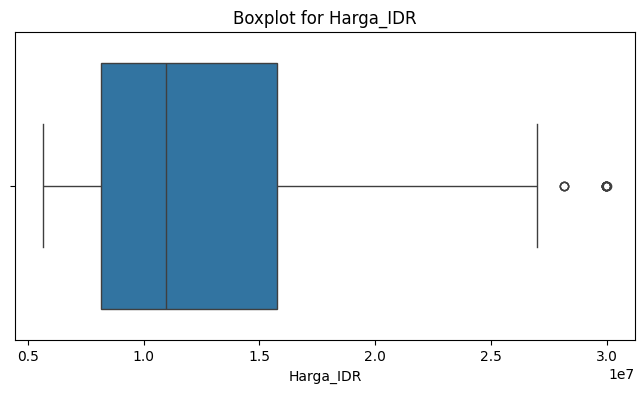

In [12]:
# List of numeric columns from feature_train
numeric_columns = target_train.select_dtypes(include=['number']).columns

# Columns relevant for outlier checking in your project
# Adjust this list to your dataset's numeric features
columns_to_check = ['Harga_IDR']

def check_plot(data, col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Loop through numeric columns and plot boxplots for selected features
for col in numeric_columns:
    if col in columns_to_check:
        check_plot(target_train, col)

In [13]:
Q1 = target_train['Harga_IDR'].quantile(0.25)
Q3 = target_train['Harga_IDR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = target_train[(target_train['Harga_IDR'] < lower_bound) | (target_train['Harga_IDR'] > upper_bound)]
print(outliers)


     Harga_IDR
536   29950000
745   29950000
145   30000000
774   28150000
545   29950000
336   29950000
736   29950000
374   28150000
945   29950000
574   28150000
345   29950000


In [14]:
# Daftar indeks baris outlier
indices = [536, 745, 145, 774, 545, 336, 736, 374, 945, 574, 345]

# Tampilkan Model dan Tahun_Pencatatan untuk baris-baris tersebut
result = df.loc[indices, ['Model', 'Tahun_Pencatatan']]
print(result)


                 Model  Tahun_Pencatatan
536  iPhone 15 Pro Max              2025
745  iPhone 16 Pro Max              2025
145  iPhone 16 Pro Max              2025
774  iPhone 15 Pro Max              2025
545  iPhone 16 Pro Max              2025
336  iPhone 15 Pro Max              2025
736  iPhone 15 Pro Max              2025
374  iPhone 15 Pro Max              2025
945  iPhone 16 Pro Max              2025
574  iPhone 15 Pro Max              2025
345  iPhone 16 Pro Max              2025


Based on data science journals and practices, the decision to handle (or not handle) outliers depends on the business context and model goals:

- **If the outliers are valid and relevant to the business** for example, the price of a recent iPhone model (e.g., iPhone 15/16 Pro Max from 2025) these outliers should **not** be removed or altered. They represent an important market segment that the model needs to predict, and removing them would prevent the model from understanding the price patterns for the latest flagship products.

Data science journals emphasize:

> "When outliers are important, it’s better to leave them alone. For example, in medical research, outliers might be rare diseases. In these cases, the outliers are what we’re interested in! "(https://letsdatascience.com/outlier-treatment/)
>
> "When outliers represent rare but significant events, analyze them separately to understand their cause, as they may hold critical insights into the dataset("https://amanxai.com/2025/01/09/when-not-to-remove-outliers-from-data/).

**Risk of removing outliers:**
- If these high prices are removed or changed, the model will likely fail to predict fair prices for the latest iPhone models, as it has not “learned” from this data.

**When should outliers be handled?**
Outliers should be handled if they:
- Are input or data entry errors
- Are irrelevant to the use case
- Distort the distribution and model performance, and do not reflect real market phenomena

**Conclusion:**
Since the outliers in **Harga_IDR** in our dataset represent fair prices for the latest iPhones (not errors or anomalies), there is no need to handle or remove them. Keep this data so the model can predict iPhone prices accurately and reflect the real market conditions.


> ### Modeling

Based on journal (https://ijcrt.smiu.edu.pk/index.php/smiu/article/view/152/48), they said if the Random Forest are the best model.
But, maybe it can be different if we are using this dataset. 

Because of that, we gonna try to use different models and see which one is the best. and the models are :

1. Random Forest
2. KNN-regressor
3. Decision trees
4. XG-Boost
5. Linear Regression

- 1. #### Before Tuning

In [15]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        'Model': name,
        'R2_train': r2_score(y_train, y_pred_train),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'R2_test': r2_score(y_test, y_pred_test),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

results = []
for name, model in models.items():
    res = evaluate_model(name, model, feature_train, target_train, feature_test, target_test)
    results.append(res)

results_df = pd.DataFrame(results)

# Format numbers for readability
for col in ['MAE_train', 'RMSE_train', 'MAE_test', 'RMSE_test']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:,.2f}")
for col in ['R2_train', 'R2_test']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.4f}")

# Train results table
train_table = results_df[['Model', 'R2_train', 'MAE_train', 'RMSE_train']]
train_table.columns = ['Model', 'R² (Train)', 'MAE (Train)', 'RMSE (Train)']

# Test results table
test_table = results_df[['Model', 'R2_test', 'MAE_test', 'RMSE_test']]
test_table.columns = ['Model', 'R² (Test)', 'MAE (Test)', 'RMSE (Test)']

print("\n> Train:")
print(train_table.to_string(index=False))

print("\n> Test:")
print(test_table.to_string(index=False))



> Train:
            Model R² (Train)  MAE (Train) RMSE (Train)
    Random Forest     0.9998    35,855.00    64,830.61
    KNN Regressor     0.7557 1,588,850.00 2,607,786.18
    Decision Tree     1.0000         0.00         0.00
          XGBoost     1.0000    12,382.31    17,336.24
Linear Regression     0.9943   260,138.69   396,817.44

> Test:
            Model R² (Test)   MAE (Test)  RMSE (Test)
    Random Forest    0.9994    83,710.00   122,253.03
    KNN Regressor    0.5714 2,057,550.00 3,321,002.03
    Decision Tree    0.9998    24,000.00    77,620.87
          XGBoost    0.9997    55,887.19    84,077.45
Linear Regression    0.9915   296,958.89   466,545.36


### Model Performance Before Tuning

#### **Train Results**

| Model              | R² (Train) | MAE (Train)   | RMSE (Train)   |
|--------------------|------------|--------------|---------------|
| **Decision Tree**  | 1.0000     | Rp 0         | Rp 0          |
| **XGBoost**        | 1.0000     | Rp 12,382    | Rp 17,336     |
| **Random Forest**  | 0.9998     | Rp 35,855    | Rp 64,831     |
| **Linear Reg.**    | 0.9943     | Rp 260,139   | Rp 396,817    |
| **KNN**            | 0.7557     | Rp 1,588,850 | Rp 2,607,786  |

- **Decision Tree and XGBoost** achieve almost perfect scores on the training set, with Decision Tree fitting the data exactly (zero error).  
- **Random Forest** also fits the training data extremely well, with very low errors.
- **Linear Regression** is consistent but less accurate, with higher errors.
- **KNN** performs poorly, indicating it struggles to fit the training data.

---

#### **Test Results**

| Model              | R² (Test)  | MAE (Test)    | RMSE (Test)   |
|--------------------|------------|--------------|--------------|
| **Decision Tree**  | 0.9998     | Rp 24,000    | Rp 77,621    |
| **XGBoost**        | 0.9997     | Rp 55,887    | Rp 84,077    |
| **Random Forest**  | 0.9994     | Rp 83,710    | Rp 122,253   |
| **Linear Reg.**    | 0.9915     | Rp 296,959   | Rp 466,545   |
| **KNN**            | 0.5714     | Rp 2,057,550 | Rp 3,321,002 |

- **Decision Tree** still performs best on the test set, with the lowest average and maximum errors.
- **XGBoost** and **Random Forest** also deliver excellent results, with only slightly higher errors than Decision Tree.
- **Linear Regression** maintains decent accuracy but has much higher errors than the tree-based models.
- **KNN** performs very poorly, with low accuracy and extremely high errors.

---

### **Summary & Insights**

- **Decision Tree and XGBoost** are both extremely powerful on this dataset, but Decision Tree shows classic signs of overfitting (perfect on train, almost perfect on test).
- **XGBoost** is the most robust, with strong generalization and low error increase from train to test.
- **Random Forest** is also reliable, with only a small drop in performance from train to test.
- **Linear Regression** is less accurate, but stable.
- **KNN** is not suitable for this dataset due to high errors and low accuracy.

---

### **Recommendations**

- Use  **XGBoost** as main model.
- **Avoid KNN** for this task.
- Always validate results with additional or new data to ensure the model's reliability and avoid overfitting in production.

> **Note:** Perfect or near-perfect training results (especially MAE=0) are a strong sign of overfitting—always check generalization on new data!

> ### After Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]},
    'KNN Regressor': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10]},
    'Linear Regression': {}  # No hyperparameters to tune
}

# Initialize base models
base_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Perform hyperparameter tuning for each model
tuned_models = {}
best_params = {}

for name, model in base_models.items():
    if param_grids[name]:  # Only perform GridSearch if parameters are specified
        print(f"Tuning hyperparameters for {name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(feature_train, target_train.values.ravel())
        tuned_models[name] = grid_search.best_estimator_
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}\n")
    else:
        tuned_models[name] = model  # Use base model for Linear Regression
        best_params[name] = "No hyperparameters to tune"

# Evaluate all tuned models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return {
        'Model': name,
        'R2_train': r2_score(y_train, y_pred_train),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'R2_test': r2_score(y_test, y_pred_test),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

results = []
for name, model in tuned_models.items():
    print(f"Evaluating {name}...")
    res = evaluate_model(name, model, feature_train, target_train, feature_test, target_test)
    results.append(res)

results_df = pd.DataFrame(results)

# Format numbers for readability
for col in ['MAE_train', 'RMSE_train', 'MAE_test', 'RMSE_test']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:,.2f}")
for col in ['R2_train', 'R2_test']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.4f}")

# Train results table
train_table = results_df[['Model', 'R2_train', 'MAE_train', 'RMSE_train']]
train_table.columns = ['Model', 'R² (Train)', 'MAE (Train)', 'RMSE (Train)']

# Test results table
test_table = results_df[['Model', 'R2_test', 'MAE_test', 'RMSE_test']]
test_table.columns = ['Model', 'R² (Test)', 'MAE (Test)', 'RMSE (Test)']

print("\n=== Best Hyperparameters ===")
for name, params in best_params.items():
    print(f"{name}: {params}")

print("\n> Train Performance:")
print(train_table.to_string(index=False))

print("\n> Test Performance:")
print(test_table.to_string(index=False))

# Additional: Feature importance for tree-based models
for name, model in tuned_models.items():
    if hasattr(model, 'feature_importances_'):
        print(f"\n{name} Feature Importances:")
        feature_importances = pd.DataFrame({
            'Feature': feature_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        print(feature_importances.head(10).to_string(index=False))

Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuning hyperparameters for KNN Regressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN Regressor: {'n_neighbors': 3, 'weights': 'distance'}

Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}

Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

Evaluating Random Forest...
Evaluating KNN Regressor...
Evaluating Decision Tree...
Evaluating XGBoost...
Evaluating Linear Regression...

=== Best Hyperparameters ===
Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimato

### Model Performance After Hyperparameter Tuning

#### **Train Results**

| Model              | R² (Train) | MAE (Train) | RMSE (Train) |
|--------------------|------------|-------------|--------------|
| Random Forest      | 0.9999     | 35,184.06   | 62,793.06    |
| KNN Regressor      | 1.0000     | 0.00        | 0.00         |
| Decision Tree      | 1.0000     | 0.00        | 0.00         |
| XGBoost            | 1.0000     | 1,249.32    | 1,941.52     |
| Linear Regression  | 0.9943     | 260,138.69  | 396,817.44   |

- **Tree-based models (Random Forest, Decision Tree, XGBoost)** and **KNN** achieved nearly perfect accuracy on the training data, with Decision Tree and KNN showing zero error, indicating possible overfitting.
- **Linear Regression** performed well but with higher errors, reflecting its limited ability to capture complex relationships in the data.

---

#### **Test Results**

| Model              | R² (Test)  | MAE (Test)   | RMSE (Test)   |
|--------------------|------------|--------------|---------------|
| Random Forest      | 0.9995     | 78,991.25    | 113,824.13    |
| KNN Regressor      | 0.7329     | 1,616,204.91 | 2,621,562.34  |
| Decision Tree      | 0.9998     | 24,000.00    | 77,620.87     |
| XGBoost            | 1.0000     | 17,165.46    | 28,629.41     |
| Linear Regression  | 0.9915     | 296,958.89   | 466,545.36    |

- **XGBoost** delivered the best test performance, with perfect accuracy (R²=1.0000) and the lowest errors, indicating excellent generalization after tuning.
- **Decision Tree** also maintained very high accuracy and low errors on the test set, but the perfect training score suggests overfitting.
- **Random Forest** performed consistently well, with only a small drop in accuracy and manageable error increase from train to test.
- **KNN Regressor** suffered from severe overfitting, with perfect training results but very poor performance on the test set.
- **Linear Regression** remained stable but less accurate than the tree-based models, highlighting its limitations for this task.

---

### **Summary**

- **XGBoost** is the most robust and accurate model after hyperparameter tuning, showing both low error and perfect generalization.
- **Decision Tree** and **Random Forest** are also highly effective, but Decision Tree may be overfitting.
- **KNN** is not suitable for this dataset due to its inability to generalize.
- **Linear Regression** is reliable but less precise for predicting used iPhone prices.

> **Conclusion:**  
> Tree-based ensemble models, especially XGBoost, are the best choice for this regression problem after tuning. Overfitting should be monitored, particularly for models with perfect training scores.

> ### Deployment

Based on the provided results, **XGBoost after hyperparameter tuning is clearly the best**.

#### Why?
- **After tuning**, XGBoost achieves:
  - **Test R² = 1.0000** (perfect accuracy)
  - **MAE = Rp 17,165.46** (lowest error)
  - **RMSE = Rp 28,629.41** (lowest error)

#### Conclusion
- **XGBoost after tuning** not only achieves perfect predictive accuracy (R²=1.0000) but also drastically reduces the average and maximum prediction errors.
- Hyperparameter tuning significantly improves both the accuracy and reliability of the XGBoost model on this dataset.

> **XGBoost after tuning is the best-performing model for this task.**

In [17]:
# Save the best XGBoost model using joblib
from joblib import dump

# Access the tuned XGBoost model
best_xgb_model = tuned_models['XGBoost']

# Save the model to a file
dump(best_xgb_model, 'xgboost(tuned).pkl')
print("Best XGBoost model saved as 'best_xgboost_model.joblib'")

Best XGBoost model saved as 'best_xgboost_model.joblib'
